In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
#############train set################

In [2]:
data = np.load('bbox_data.npy')

In [3]:
data.shape

(5, 73257)

In [4]:
#reference: digitstruct_to_npy
height = data[0]
width = data[1]
left = data[2]
top = data[3]
imgsrc = data[4]
numdigits = data.shape[1]
numImages = int(np.max(imgsrc))
imgfolder = 'train/train/'

In [5]:
numImages

33402

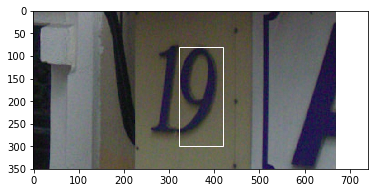

In [6]:
#tool to view original image (imgNum is index of image)
imgNum = 1
img = Image.open(imgfolder+str(imgNum)+'.png')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.add_patch(patches.Rectangle((left[1], top[1]), width[1], height[1], fill=False, edgecolor='white'))
plt.show()

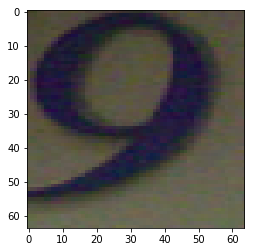

In [7]:
#tool to view cropped digit by bounding box (i is index of digit)
size = 64, 64
i = 1
imgNum = int(imgsrc[i])
img = Image.open(imgfolder+str(imgNum)+'.png').copy()
img = img.crop((left[i], top[i], left[i] + width[i], top[i] + height[i]))
img = img.resize(size)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
plt.show()

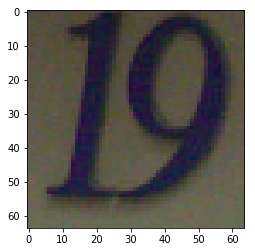

In [9]:
#tool to view cropped image that contain all digits (i is index of digit, imgNum is corresponding index of image)
size = 64, 64
i = 0
imgNum = int(imgsrc[i])
leftbound = left[i]
upperbound = top[i]
rightbound = left[i] + width[i]
lowerbound = top[i] + height[i]

while int(imgsrc[i]) == imgNum:
    leftbound = np.minimum(left[i],leftbound)
    upperbound = np.minimum(top[i],upperbound)
    rightbound = np.maximum(left[i] + width[i],rightbound)
    lowerbound = np.maximum(top[i] + height[i],lowerbound)
    i += 1

img = Image.open(imgfolder+str(imgNum)+'.png').copy()
img = img.crop((leftbound, upperbound, rightbound, lowerbound))
img = img.resize(size)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
plt.show()

In [16]:
############ create the path to savefolder first#################
#directly crop bbox containing all digits in 1 image to produce data
savefolder = 'train/croppedtight/'
size = 54, 54
#store all bounding box params(left,upper,right,lower) for all image
bbox = np.zeros((numImages,4))

i = 0
for imgNum in range(1,numImages+1):
    num = 1
    leftbound = left[i]
    upperbound = top[i]
    rightbound = left[i] + width[i]
    lowerbound = top[i] + height[i]
    i += 1
    
    while (i < numdigits) and (int(imgsrc[i]) == imgNum):
        leftbound = np.minimum(left[i],leftbound)
        upperbound = np.minimum(top[i],upperbound)
        rightbound = np.maximum(left[i] + width[i],rightbound)
        lowerbound = np.maximum(top[i] + height[i],lowerbound)
        num += 1
        i += 1
    #store bounding box params
    bbox[imgNum-1] = np.array([leftbound,upperbound,rightbound,lowerbound])
    
    img = Image.open(imgfolder+str(imgNum)+'.png').copy()
    img = img.crop((leftbound, upperbound, rightbound, lowerbound))
    img = img.resize(size)
    img.save(savefolder+str(imgNum)+'tight.png')


In [42]:
############ create the path to savefolder first#################
#not used in the project but for presentation
# expand bbox containing all digits in 1 image and crop to produce data
savefolder = 'train/croppedexpand/'
size = 54, 54

for imgNum in range(numImages):
    num = 1
    
    #expand bbox by 30%
    bboxWidth = bbox[imgNum,2] - bbox[imgNum,0]
    bboxHeight = bbox[imgNum,2] - bbox[imgNum,0]
    
    #left,top must be > 0
    leftbound = np.maximum(0.0, bbox[imgNum,0] - (bboxWidth * 0.15)) 
    upperbound = np.maximum(0.0, bbox[imgNum,1] - (bboxHeight * 0.15))
    rightbound = leftbound + (bboxWidth * 1.3)
    lowerbound = upperbound + (bboxHeight * 1.3)
    
    
    img = Image.open(imgfolder+str(imgNum+1)+'.png').copy()
    img = img.crop((leftbound, upperbound, rightbound, lowerbound))
    img = img.resize(size)
    img.save(savefolder+str(imgNum+1)+'expand.png')

In [44]:
############ create the path to savefolder first#################
#expand bbox containing all digits, crop, and then sample multiple region to produce data
savefolder = 'train/croppedsampled/'
bbox_size = 64, 64
size = 54, 54
#num samples from 1 cropped digit image
numsamples = 5

for imgNum in range(numImages):
    num = 1
    
    #expand bbox by 30%
    bboxWidth = bbox[imgNum,2] - bbox[imgNum,0]
    bboxHeight = bbox[imgNum,2] - bbox[imgNum,0]
    
    #left,top must be > 0
    leftbound = np.maximum(0.0, bbox[imgNum,0] - (bboxWidth * 0.15)) 
    upperbound = np.maximum(0.0, bbox[imgNum,1] - (bboxHeight * 0.15))
    rightbound = leftbound + (bboxWidth * 1.3)
    lowerbound = upperbound + (bboxHeight * 1.3)
    
    
    img = Image.open(imgfolder+str(imgNum+1)+'.png').copy()
    img = img.crop((leftbound, upperbound, rightbound, lowerbound))
    img = img.resize(bbox_size)
    
    #random sample k shift version
    for k in range(numsamples):
        loc = np.random.randint(0,9,size = (2,))
        sample = img.crop((loc[0], loc[1], loc[0] + size[0], loc[1] + size[1]))
        sample.save(savefolder+str(imgNum+1)+'_'+str(k)+'.png')


In [ ]:
#############test set################

In [3]:
data = np.load('test_bbox_data.npy')

In [4]:
data.shape

(5, 26032)

In [5]:
height = data[0]
width = data[1]
left = data[2]
top = data[3]
imgsrc = data[4]
numdigits = data.shape[1]
numImages = int(np.max(imgsrc))
imgfolder = 'test/test/'

In [6]:
numImages

13068

In [8]:
#directly crop bbox containing all digits in 1 image to produce data
savefolder = 'test/croppedtight/'
size = 54, 54
#store all bounding box params(left,upper,right,lower) for all image
bbox = np.zeros((numImages,4))

i = 0
for imgNum in range(1,numImages+1):
    num = 1
    leftbound = left[i]
    upperbound = top[i]
    rightbound = left[i] + width[i]
    lowerbound = top[i] + height[i]
    i += 1
    
    while (i < numdigits) and (int(imgsrc[i]) == imgNum):
        leftbound = np.minimum(left[i],leftbound)
        upperbound = np.minimum(top[i],upperbound)
        rightbound = np.maximum(left[i] + width[i],rightbound)
        lowerbound = np.maximum(top[i] + height[i],lowerbound)
        num += 1
        i += 1
    #store bounding box params
    bbox[imgNum-1] = np.array([leftbound,upperbound,rightbound,lowerbound])
    
    img = Image.open(imgfolder+str(imgNum)+'.png').copy()
    img = img.crop((leftbound, upperbound, rightbound, lowerbound))
    img = img.resize(size)
    img.save(savefolder+str(imgNum)+'tight.png')
